In [69]:
#to plot inside the notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='poster', style='dark')

#Load some house sales data

In [70]:
sales = pd.read_csv("home_data.csv")

In [3]:
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


#Exploring the data for housing sales

D:\conda1\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


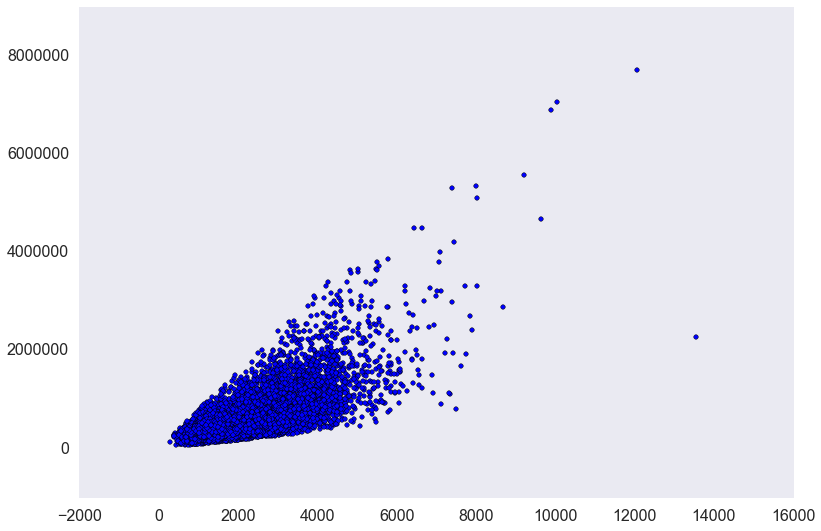

In [51]:
plt.scatter(sales['sqft_living'], sales['price'])
#remove scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,1000000000))
plt.show()


#Create a simple regression model of sqft_living to price

In [71]:
from sklearn.cross_validation import train_test_split
train_data,test_data = train_test_split(sales,train_size=0.8)

In [5]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8342,3888100043,20140507T000000,350000,3,1.00,1010,9360,1,0,0,...,6,1010,0,1981,0,98033,47.6874,-122.168,1470,9360
2203,3905120830,20150415T000000,612000,3,2.50,2180,5496,2,0,0,...,8,2180,0,1994,0,98029,47.5723,-122.007,2120,5496
15748,3342103281,20141020T000000,500000,4,1.00,1160,20100,1,0,0,...,6,820,340,1913,0,98056,47.5175,-122.201,1670,10200
18750,4038400150,20141113T000000,465000,3,1.75,2760,9137,1,0,0,...,7,1380,1380,1960,0,98007,47.6079,-122.132,1980,9137
7120,6055000430,20150327T000000,473000,4,3.50,4370,37193,2,0,3,...,8,2780,1590,1996,0,98022,47.2410,-121.979,2860,39356


In [7]:

len(train_data)

17290

In [8]:
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8409,7855800910,20150321T000000,871000,4,2.50,2150,8536,1,0,3,...,8,1400,750,1967,0,98006,47.5663,-122.163,2800,9500
20630,301400320,20140725T000000,255900,3,2.50,1489,3266,2,0,0,...,7,1489,0,2014,0,98002,47.3452,-122.217,1537,3273
8322,1443500395,20150504T000000,360000,3,1.50,1060,6232,1,0,0,...,7,1060,0,1968,0,98118,47.5329,-122.271,1120,5379
18334,6744700343,20141209T000000,480000,5,3.00,2240,15435,1,0,1,...,7,1390,850,1952,0,98155,47.7426,-122.288,2240,10750
8268,8563300085,20141201T000000,425000,3,1.75,1530,9800,1,0,0,...,8,1530,0,1958,0,98133,47.7655,-122.336,1660,9800


In [8]:

len(test_data)

10807

#Build the regression the model

In [72]:
from sklearn.linear_model import LinearRegression
X = train_data[['sqft_living']]
y=train_data.price
#build the linear regression object
lm=LinearRegression()
# Train the model using the training sets
lm.fit(X,y)
#print the y intercept
print(lm.intercept_)
#print the coefficents
print(lm.coef_)


-47057.0235949
[ 282.71602325]


The Linear Model of the houses is  -40151.42 + 278.29X

#Find the root mean squared error

In [73]:
test_X = test_data.sqft_living.values
print(test_X)
print(np.shape(test_X))
print(len(test_X))
test_X = np.reshape(test_X, [4323, 1])
print(test_X)

[3650 1350 1020 ..., 4350 1000 2680]
(4323,)
4323
[[3650]
 [1350]
 [1020]
 ..., 
 [4350]
 [1000]
 [2680]]


In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
MSE = mean_squared_error(y_true = test_data.price.values, y_pred = lm.predict(test_X))
MSE

61305101053.439362

In [75]:
MSE**(0.5)

247598.66932889473

D:\conda1\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


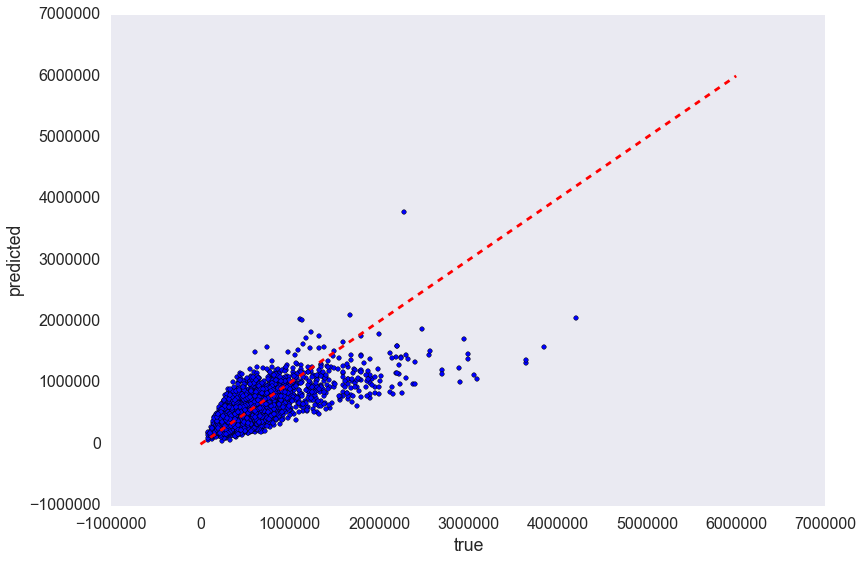

In [55]:
plt.scatter(test_data.price.values, lm.predict(test_X))
plt.xlabel('true')
plt.ylabel('predicted')
plt.plot([0,6000000], [0,6000000], 'r--')

#Predict the Price of a House if the Living Space was 300 square feet

In [10]:
lm.predict(300)

array([ 29737.27972893])

In [11]:
#calculate squared
lm.score(X,y)

0.50008211505750078

#Explore other features in the data

In [56]:
my_features =['bedrooms','bathrooms','sqft_living','floors','zipcode']

In [57]:
print(sales[my_features].head())
feats = sales[my_features]

   bedrooms  bathrooms  sqft_living  floors  zipcode
0         3       1.00         1180       1    98178
1         3       2.25         2570       2    98125
2         2       1.00          770       1    98028
3         4       3.00         1960       1    98136
4         3       2.00         1680       1    98074


In [58]:
feats.describe()

,bedrooms,bathrooms,sqft_living,floors,zipcode
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.494309,98077.939805
std,0.930062,0.770163,918.440897,0.539989,53.505026
min,0.000000,0.000000,290.000000,1.000000,98001.000000
25%,3.000000,1.750000,1427.000000,1.000000,98033.000000
50%,3.000000,2.250000,1910.000000,1.500000,98065.000000
75%,4.000000,2.500000,2550.000000,2.000000,98118.000000
max,33.000000,8.000000,13540.000000,3.500000,98199.000000


In [76]:
# create X and y

X = sales[my_features]
y = sales.price

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X, y)

# print intercept and coefficients
print(regr.intercept_)
print(regr.coef_)

-58111187.5422
[-56592.50762573  13804.93521027    312.40138125  -2765.25947844
    593.07133382]


#Compare the two Linear Models

In [23]:
regr.predict([3,2,3000,2,98006])

array([ 802867.5723311])

In [77]:
#my_features =['bedrooms','bathrooms','sqft_living','floors','zipcode']
test_X =[test_data.bedrooms.values, test_data.bathrooms.values,test_data.sqft_living.values,test_data.floors.values,
         test_data.zipcode.values]
print(test_X)
len(test_X)
print(np.shape(test_X))
test_X=np.reshape(test_X,[4323,5])
MSE1 = mean_squared_error(y_true = test_data.price.values, y_pred = regr.predict(test_X))
MSE1**(0.5)
#test_X[2]
#print(test_X)

[array([5, 2, 2, ..., 5, 2, 3], dtype=int64), array([ 3.  ,  1.  ,  1.5 , ...,  3.  ,  1.75,  2.5 ]), array([3650, 1350, 1020, ..., 4350, 1000, 2680], dtype=int64), array([ 1.,  1.,  3., ...,  2.,  1.,  2.]), array([98006, 98126, 98103, ..., 98005, 98109, 98077], dtype=int64)]
(5, 4323)


1985657611.582186

D:\conda1\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


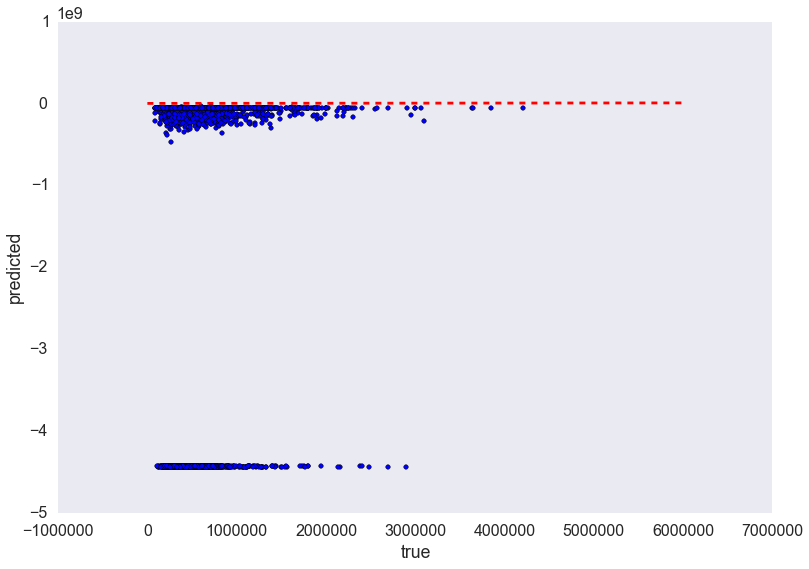

In [62]:
plt.scatter(test_data.price.values, regr.predict(test_X))
plt.xlabel('true')
plt.ylabel('predicted')
plt.plot([0,6000000], [0,6000000], 'r--')

#Apply learned models to predict prices  houses

In [33]:
house1 = sales[sales['id']== 5309101200]
print(house1['price'])

1054    620000
Name: price, dtype: int64


In [35]:
print(lm.predict(house1.sqft_living))

[ 630656.25367539]


In [36]:
my_features =['bedrooms','bathrooms','sqft_living','floors','zipcode']
print(regr.predict(house1[my_features]))

[ 629499.01755095]


##Prediction for a second,fancier house

In [41]:
house2= sales[sales['id']==1925069082]
house2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2,1,4,...,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [43]:
print(lm.predict(house2['price']))

[  6.23923095e+08]


In [44]:
my_features =['bedrooms','bathrooms','sqft_living','floors','zipcode']
print(regr.predict(house2[my_features]))

[ 1260363.20790849]


##Last house, super fancy


bill_gates ={'bedrooms':[8],
'bathrooms':[25],
'sqft_living':[50000],
'floors':[4],
'zipcode':[98039],
'condition':[10],
'grade':[10],
'waterfront':[1]}

<img src="http://thedailybanter.com/wp-content/uploads/2013/10/bill-gates-house.jpg ">

In [48]:
print(lm.predict(50000))

[ 14131165.94159572]


In [49]:
bill_gates_features=[8,25,50000,4,98039]
print(regr.predict(bill_gates_features))

[ 15534324.29785082]


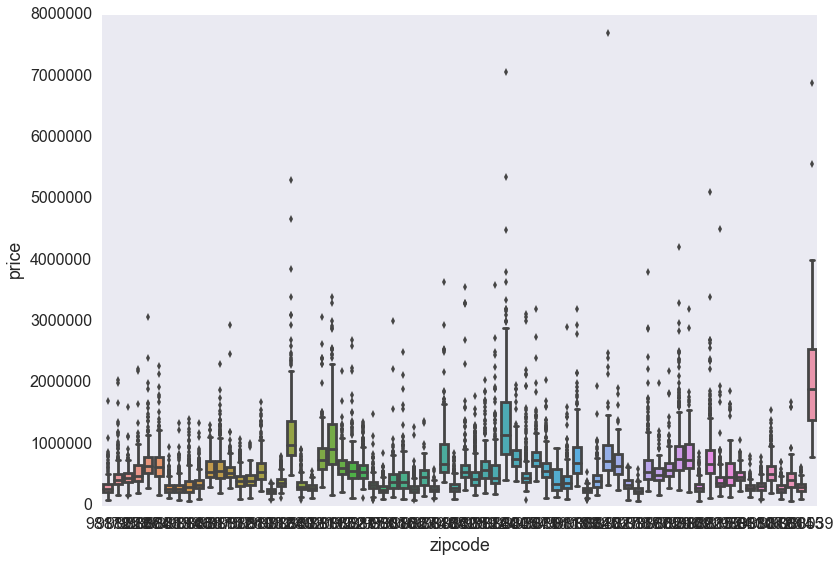

In [63]:
 ax = sns.boxplot(x="zipcode", y="price", data=sales)

D:\conda1\lib\site-packages\IPython\kernel\__main__.py:15: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0x275fcc50>,
 'caps': [<matplotlib.lines.Line2D at 0x276026d8>,
 'fliers': [<matplotlib.lines.Line2D at 0x27b85eb8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x27b8acf8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x275f2b70>,
  <matplotlib.lines.Line2D at 0x2818a860>]}

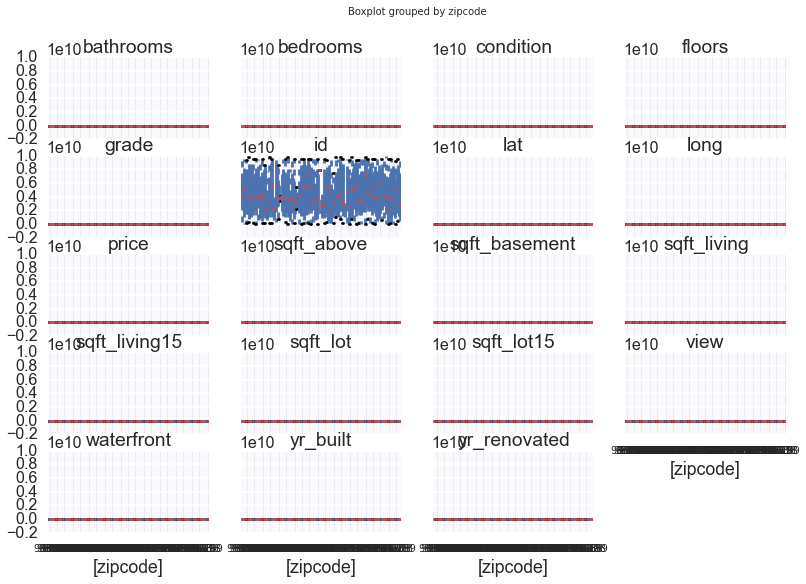

In [65]:

#data = data.reset_index().groupby('zipcode').sum()
data =sales.groupby('zipcode').sum()
type(data)
data.shape
data.head()
dat = data[['price']]
dat
#dat.boxplot()
sales1 =sales

#sales.boxplot(by='zipcode')

sales1.boxplot(by='zipcode')
data.boxplot()



In [56]:
data =sales[['zipcode','price','id']]
#data.boxplot(by='zipcode')
data.shape

'''
data1 =data.groupby(data.zipcode).sum()
#data

#data1.boxplot(by='index')
#print(data.groupby(data.zipcode).mean().head())
#print(data.groupby(data.zipcode).sum().head())
data1=data.reset_.groupby("zipcode").sum()
data[['price']]
'''
#data1.boxplot(data1[['price']])

#sales.pivot(index='date', columns='variable', values='value')




'\ndata1 =data.groupby(data.zipcode).sum()\n#data\n\n#data1.boxplot(by=\'index\')\n#print(data.groupby(data.zipcode).mean().head())\n#print(data.groupby(data.zipcode).sum().head())\ndata1=data.reset_.groupby("zipcode").sum()\ndata[[\'price\']]\n'

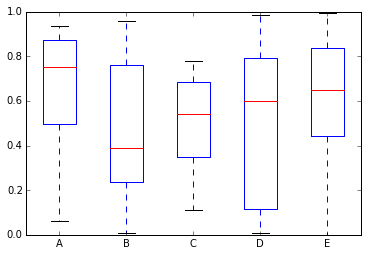

In [66]:
#data = [data,sales.zipcode,sales.prices]
#plt.boxplot(sales.zipcode)
#http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
data = sales.reset_index().groupby("zipcode").sum()
data.price
q = np.reshape(data.price, [1, len(data)])
q

#plt.boxplot(q)
df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot(kind='box')   

In [ ]:
ax = sns.boxplot(x="size", y="tip", data=tips.sort("size"))